# Description
* this code is used to submit this competition https://www.kaggle.com/c/digit-recognizer

In [0]:
import sys, os
WORKING_DIR = None
if os.environ.get('COLAB_GPU', False):
    from google.colab import drive
    drive.mount("/content/drive")
    WORKING_DIR = "/content/drive/My Drive/Colab Notebooks/handwriting"
    sys.path.append(WORKING_DIR)
else:
    WORKING_DIR = "./"
print(WORKING_DIR)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/handwriting


# Importing

In [0]:
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import math

# Data Reading and Understanding

In [0]:
data_train = pd.read_csv(os.path.join(WORKING_DIR, 'data/train.csv'))
data_test = pd.read_csv(os.path.join(WORKING_DIR, 'data/test.csv'))

print("training data shape:", data_train.shape)
print("test data shape:", data_test.shape)
print(math.sqrt(784))
data_train.head()

training data shape: (42000, 785)
test data shape: (28000, 784)
28.0


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


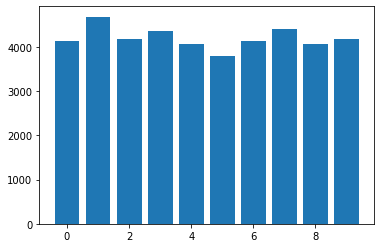

In [0]:
value_dist = data_train['label'].value_counts()
plt.bar(value_dist.index, value_dist)
plt.show()

In [0]:
X = data_train.drop('label', axis=1).values.astype(dtype=np.float32).reshape(X.shape[0], 28, 28, 1)
X = X/255.0
y = data_train['label'].values.astype(dtype=np.int32)
X_train, X_cross, y_train, y_cross = train_test_split(X, y, train_size=0.8, random_state=42)
X_test = data_test.values.astype(dtype=np.float32).reshape(X_test.shape[0], 28, 28, 1)
X_test = X_test/255.0

X_train.shape, y_train.shape, X_cross.shape, y_cross.shape, X_test.shape


((33600, 28, 28, 1), (33600,), (8400, 28, 28, 1), (8400,), (28000, 28, 28, 1))

In [0]:
print(y_train)

[6 5 3 ... 2 6 0]


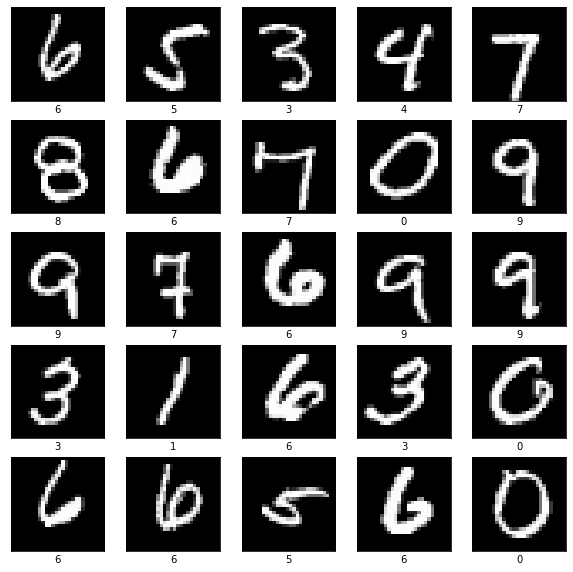

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.xlabel(y_train[i])
plt.show()

In [0]:
# Create model
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
# add fully connected layer
model.add(layers.Flatten())
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 56)          28280     
Total params: 42,728
Trainable params: 42,728
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_cross, y_cross))

Epoch 1/10
1050/1050 [==============================] - 30s 28ms/step - loss: 0.2073 - accuracy: 0.9367 - val_loss: 0.0832 - val_accuracy: 0.9735
Epoch 2/10
1050/1050 [==============================] - 29s 28ms/step - loss: 0.0584 - accuracy: 0.9819 - val_loss: 0.0474 - val_accuracy: 0.9835
Epoch 3/10
1050/1050 [==============================] - 28s 27ms/step - loss: 0.0410 - accuracy: 0.9880 - val_loss: 0.0404 - val_accuracy: 0.9861
Epoch 4/10
1050/1050 [==============================] - 29s 28ms/step - loss: 0.0330 - accuracy: 0.9893 - val_loss: 0.0382 - val_accuracy: 0.9883
Epoch 5/10
1050/1050 [==============================] - 29s 28ms/step - loss: 0.0254 - accuracy: 0.9914 - val_loss: 0.0395 - val_accuracy: 0.9882
Epoch 6/10
1050/1050 [==============================] - 28s 27ms/step - loss: 0.0217 - accuracy: 0.9929 - val_loss: 0.0436 - val_accuracy: 0.9871
Epoch 7/10
1050/1050 [==============================] - 28s 27ms/step - loss: 0.0180 - accuracy: 0.9945 - val_loss: 0.0454 -

263/263 - 2s - loss: 0.0467 - accuracy: 0.9861


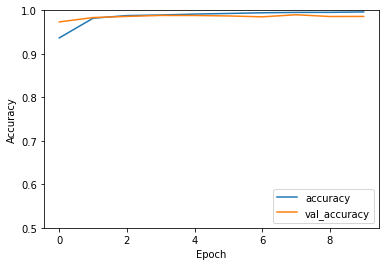

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_cross,  y_cross, verbose=2)

In [0]:
print(test_acc)

0.9860714077949524


In [0]:
y_pred = model.predict_classes(X_test)
y_pred

In [0]:
result_dict = dict()
result_dict['ImageId'] = [i+1 for i in range(len(y_pred))]
result_dict['Label'] = y_pred
df = pd.DataFrame(data=result_dict)

output_file = os.path.join(WORKING_DIR, 'results/mnist.csv')
try:
    os.mkdir(os.path.dirname(output_file))
except:
    pass

df.to_csv(output_file, index=False)

# References
1. https://www.kaggle.com/c/digit-recognizer
1. https://www.tensorflow.org/tutorials/images/cnn
1. https://medium.com/@mrkardostamas/emnist-handwritten-character-recognition-with-deep-learning-b5d61ac1aab7
1. https://github.com/shubhammor0403/EMNIST
